![](logo3.png)

## Tabla de Contenido


[1. Contexto de la práctica](#id1)<br>
[2. Cargar dataset](#id2)<br>
[3. Centrar Mapa en San Francisco](#id3)<br>
[4. Poner Marcadores de circulo en la ubicación donde se registro el incidente](#id4)<br>
[5. Agregar ventana emergente con la información de la categoria del incidente](#id5)<br>
[6. Agrupar marcadores](#id6)<br>

## 1. Contexto de la práctica <a id='id1'> </a>

- En esta práctica se familiarizará con la libreria **Folium**.
- Folium es una biblioteca para crear mapas interactivos.
- Analizará un conjunto de datos que contiene **información sobre inmigracion de los países hacia Canada**. 
- Analizará datos históricos sobre la Inmigración a Canadá de 1980 a 2013 
- El conjunto de datos contiene datos anuales sobre los flujos de migrantes internacionales registrados por los países de destino.

## 2.Cargar Dataset  <a id='id2'> </a>

In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar dataset y mostrar los primeros 5 registros

df_can= pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship',
                     skiprows= range(20),
                     skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# Borrar columnas inncesarias

df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace= True)

In [4]:
# Renombrar columnas 

df_can.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName':'Region'},
             inplace= True)

In [5]:
df_can.columns = list(map(str, df_can.columns))

In [6]:
# Agregar columna de Total de inmigrantes por país

df_can['Total'] = df_can.sum(axis=1)

C:\Users\jgab\AppData\Local\Temp\ipykernel_9220\3296704916.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [7]:
# verificar la nueva columna 
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [8]:
# Variable con los datos geograficos del munco

world_geo = r'world_countries.json'

In [9]:
# generar mapa con vista de los continentes
world_map = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Terrain')
world_map.choropleth(
geo_data=world_geo,
data = df_can,
columns=['Country', 'Total'],
key_on='feature.properties.name',
fill_color='YlOrRd',
fill_opacity=0.7,
line_opacity=0.2,
legend_name='Inmigracion de los paises a canada' )

world_map

C:\Anaconda3\envs\Diplomado python\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [10]:
# Ordenamos el dataset por el total de inmigrantes 
# Nos interesan los paises que mas inmigrantes tienen hacia Canada

df_can.sort_values(['Total'], ascending= False,
                      axis=0, inplace= True)

In [11]:
# Establecemos el nombre del páis como indice

df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [12]:
#Crear nuevo dataset con el top 5 de paises con mas migrantes a Canada

df_top5 = df_can.head()
df_top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [13]:
# Creamos una lista de los años que servira para pivotear el dataframe
# de esta forma será mas fácil generar los gráficos 

years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [14]:
# Transponer renglones y columnas

df_top5 = df_top5[years].transpose()
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


<AxesSubplot:>

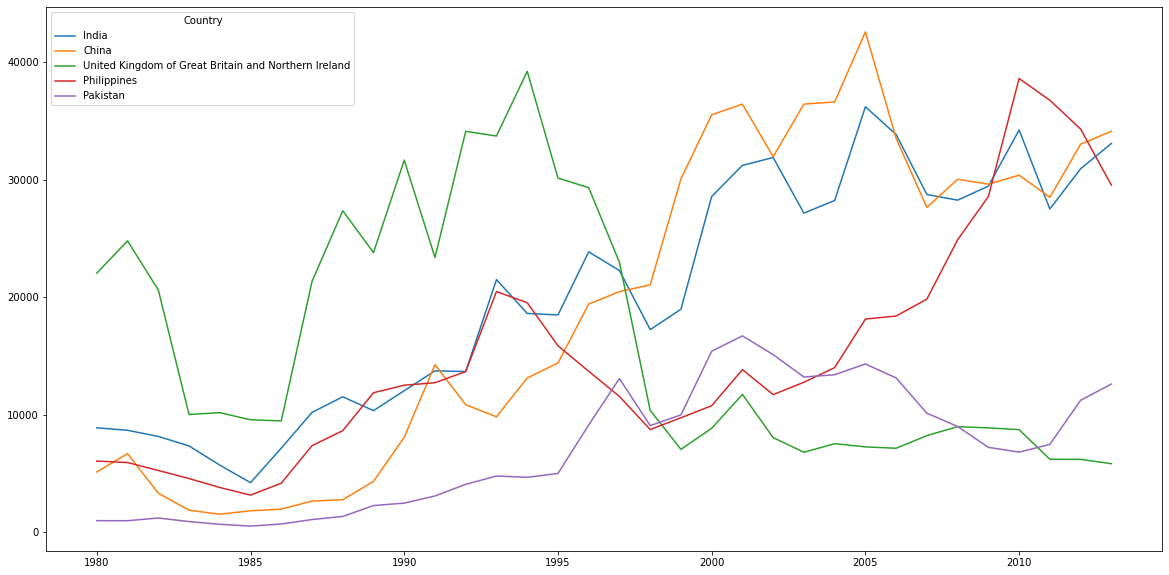

In [15]:
# generamos un grafico de lineas que muestra la evolucion o tendencia de migracion  de los 5 paises hacia Canada

df_top5.plot.line(figsize=(20,10) )

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

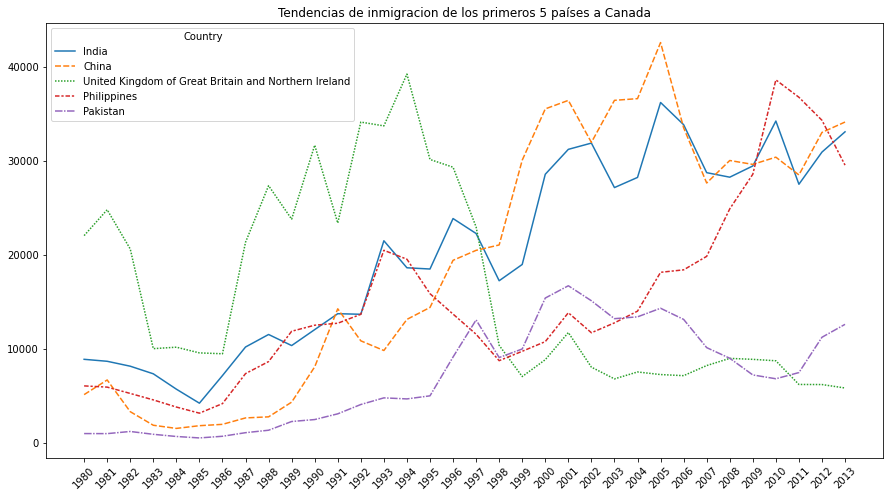

In [17]:
# Agregar titilo al grafico y rotar 45 grados las leyendas del eje x

plt.figure(figsize = (15,8))

plt.title('Tendencias de inmigracion de los primeros 5 países a Canada')

ax = sns.lineplot( data= df_top5 )

# Rotar las etiquetas del eje x
ax = plt.xticks(rotation=45)

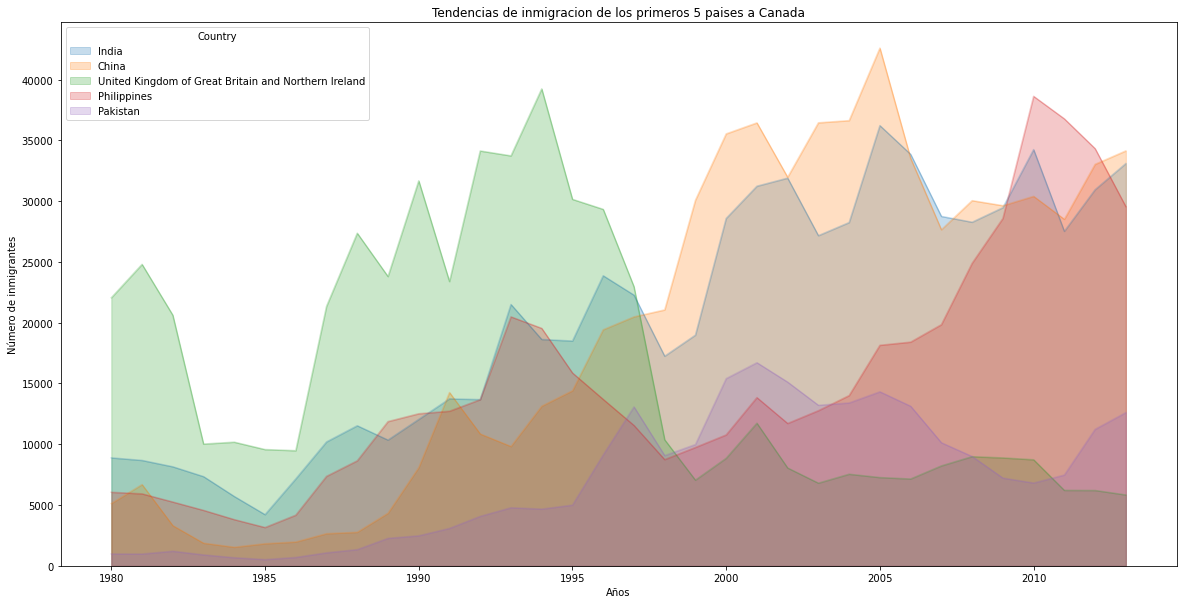

In [18]:
# Crear un gráfico de areas (similar al anterior)

df_top5.plot( kind='area',
             alpha=0.25,
            stacked=False,
            figsize=(20,10) )
plt.title('Tendencias de inmigración de los primeros 5 países a Canada')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')
plt.show()

In [19]:
df_mexico = df_can.loc['Mexico', years]
df_mexico.head()

1980    409
1981    394
1982    491
1983    490
1984    509
Name: Mexico, dtype: object

Text(0.5, 1.0, 'Inmigrantes mexicanos a canada desde 1980 al 2013')

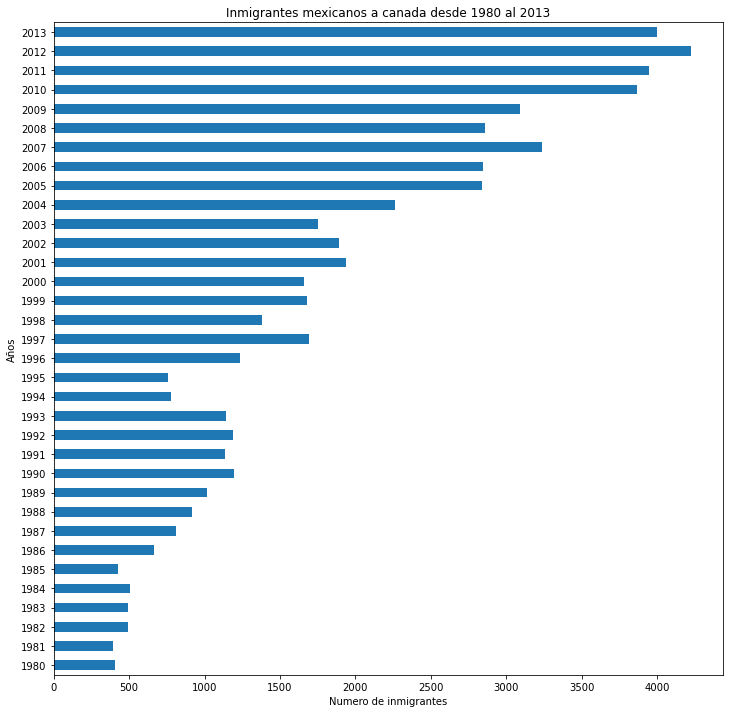

In [20]:
# En los diagramas de barras la longitud de la barra corresponde al valor 
# de la variable numérica 

# Generamos una grafica de barra horizontal
df_mexico.plot(kind='barh', figsize=(12,12))

plt.xlabel('Numero de inmigrantes')
plt.ylabel('Años')
plt.title('Inmigrantes mexicanos a canada desde 1980 al 2013')

In [21]:
# Creamos un nuevo dataframe agrupando la informacion por continente

df_continentes = df_can.groupby('Continent', axis=0).sum()
df_continentes

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


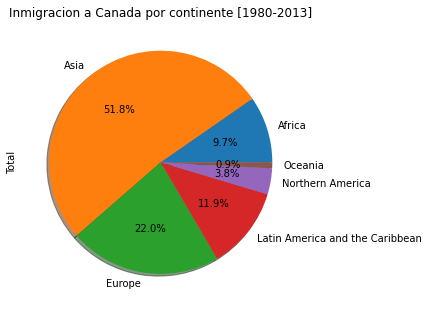

In [22]:
df_continentes['Total'].plot(kind='pie',
                            figsize = (5,6),
                            autopct='%1.1f%%',
                            startangle=0,
                            shadow=True)
plt.title('Inmigracion a Canada por continente [1980-2013]')
plt.show()